# Analytics Labs

## Lab 1 - Mastermind entropy

DS 1001 - Spring 2023 - Professors Wright and Alonzi

Due: End of lab period (or later that day)

Submission format: Word doc or PDF summarizing your findings

Individual Assignment

**General Descripition:** This lab is designed to introduce the basic concepts behind information gain and entropy. Mastermind is a game were through a series of questions one player tries to determine a "code" created by another player. In doing so the value of asking questions that provide a high level of information will become paramount.

Preparatory Assignments - None

**Why am I doing this?** In order to gain a better understanding of information gain and entropy through hands on experience.

**What am I going to do?** Work with a partner or group of three and alternate playing the game. At the onset of each game the code-maker should calculate the entropy of the chosen pegs for the "code". The code-breaker should note the results of the game . This should include whether the code was broken or not and the number of rounds used. Try to be the code-maker and breaker at least 3 times. The code-maker should intentionally use very different types of "code", this should impact how the game is played.

-   Note the range of entropy for binary cases is 0 to 1 for more than 2 classes it is 0 to log~2~ *k*, where *k* is the number of classes.

**Answer these questions:**

1.  What combinations of pegs (code) seemed to be harder to break?
2.  Did your approach to asking questions change as you played?
3.  Describe where in the game information gain is being presented?

Tips for success:

-   Don't worry about winning, instead think about what is happening during game play.
-   Work as a team with your group.
-   Try to document the process used right at the start of the lab, don't wait till after you have played to start taking notes.

How will I know I have succeeded:

| Specs Category | Specs Details                                                                                                                      |
|----------------|------------------------------------------------------------------------------------------------------------------------------------|
| Formatting     | - Submit via Canvas a PDF or Word document                                                                                         |
| Text           | - Answer the above questions <br/> - When you were the code-maker submit the Entropy <br/> - When you were the code breaker submit the results |

Acknowledgements: Special thanks for Jess Taggart from UVA CTE for coaching us. This structure is pulled directory from Steifer & Palmer (2020).

## Lab 2 - Garbage In Garbage Out


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/analytics-lab-IIa.ipynb)

In [1]:
# pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm


**What we are going to do is create a linear model using old faithful data. Then we are going to add Gaussian noise iteratively to a dataset and pass the new noisy dataset to a the same linear regression model and track the ability of the model to learn the target as noise increases.**

1. Read this brief wiki on garbage in garbage out: [article](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)  

2. Work through the below notebook, paying close attention to the comments and the outputs of the code. 

3. Answer the questions at the end as they relate to the process of adding noise to a dataset and then passing it to a linear regression model.

In [2]:
# The dataset we will be using is a well known measure of eruption and wait times for old faithful. 
# Take a look at the documentation 
# here: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/faithful


# This is our data source (.tsv == tab separated), here we are creating a variable that holds the url to the data.
# If you click the {x} in the ribbon to the left you will see the variables you have created.
url="https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv"


# Here we are reading in the data, and use the "tab" as a separator so the data will be loaded 
# in correctly.  pd stands for pandas and "pd.read_csv" is the function we are 
# using to read in the data from the url.
old_faith = pd.read_csv(url, sep='\t')


#### Let's take a quick look at a scatter plot to get an idea of the distribution of the data. 

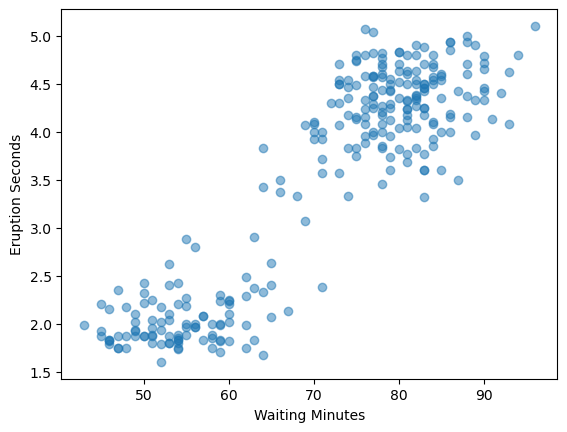

In [3]:
#plt (matplotlib.pyplot) is the library we are using to create our scatter plot.  We are using the "scatter" function, 
# and the alpha is the transparency of the dots.
plt.scatter(old_faith.waiting,old_faith.eruptions, alpha=0.5)
# here we are adding the labels to the x and y axis
plt.ylabel("Eruption Seconds")
plt.xlabel("Waiting Minutes")

#this is the function that renders the plot
plt.show()

# Note the patterns that you see, (you'll need this for your submission) 

#### Next lets build a linear regression model to predict Eruption Length based on Waiting Time 

In [4]:
#Here we are using the statsmodels library to create a linear regression model. sm stands for statsmodels and OLS 
# stands for Ordinary Least Squares.  We are using the "fit" function to fit the model to the data.
lm = sm.OLS(old_faith['waiting'],old_faith['eruptions']).fit()

# Now we are printing out the summary of the model (lm). The summary function will give you the R2 measure, along with 
# other measures of model fit. 
lm.summary()

#Using the R2 measure, how well does the model predict eruption length (scale of 0 to 1,
#  where 1 is perfect, again needed for your submission)?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                   9.97e-214
Time:                        14:27:18   Log-Likelihood:                         -1060.7
No. Observations:                 272   AIC:                                      2123.
Df Residuals:                     271   BIC:                                      2127.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.4019      0.198     98.086      0.000      19.013      19.791
==============================================================================
Omnibus:                       31.065   Durbin-Watson:                   2.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.019
Skew:                           0.148   Prob(JB):                      0.00667
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we are creating "noise" that aligns to a normal or gaussian distribution, thus gaussian noise, to add to the data.

In [5]:
# mu= mean and sigma = standard deviation, these are the inputs you will be changing
mu, sigma = 0, .5 
# We need to create noise with the same dimensions as the dataset (272,2), this will allow us 
# to combine them easily
noise = np.random.normal(mu, sigma, [272,2])
# The print function will print the first 5 rows of the noise array 
print(noise[0:5])

[[-4.73379175e-01  4.15215621e-01]
 [ 7.53308306e-01  5.27361041e-01]
 [-2.10126216e-01 -3.53914072e-01]
 [-4.85367621e-02  1.60794445e-04]
 [ 1.88876795e-02  9.53317799e-01]]


#### Really a small change, let's see what happens to model quality

In [6]:
# Here we are adding the noise to the dataset
old_faith_1=old_faith + noise

#Create a new model with the noise added to the data
lm_1 = sm.OLS(old_faith_1['waiting'],old_faith_1['eruptions']).fit()

#Checking the R2 number, note what happens.
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                waiting   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              6028.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                   3.66e-187
Time:                        14:27:18   Log-Likelihood:                         -1122.0
No. Observations:                 272   AIC:                                      2246.
Df Residuals:                     271   BIC:                                      2250.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eruptions     19.3752      0.250     77.638      0.000      18.884      19.867
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.551
Skew:                           0.157   Prob(JB):                        0.279
Kurtosis:                       2.645   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now let's take a look at that same scatter plot but with the new data

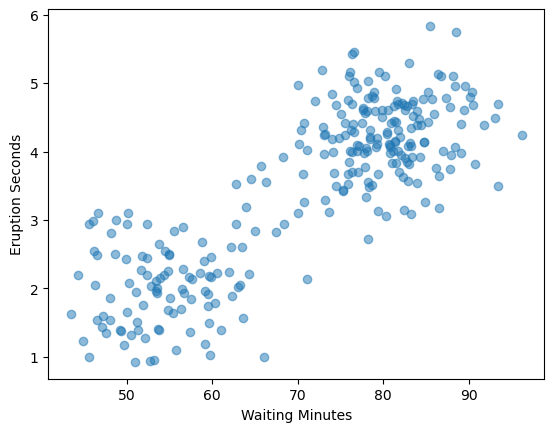

In [7]:
plt.scatter(old_faith_1.waiting,old_faith_1.eruptions, alpha=0.5)
plt.ylabel("Eruption Seconds")
plt.xlabel("Waiting Minutes")

plt.show()


### Task 1: Slowly change the standard deviation (increments of .25, stopping at 3.5), add the noise array to the dataset with each increase, re-run the model and see what happens with the R2 number, note the pace of change of the model (write it down).  

### Task 2: Following the same process above but instead adjust the mean to three different increasing increments but leave the standard dev at .05, note how this changes the model fit.  

### Questions for submission: 

1. What patterns do you see in the original data (from the scatter plot)? 

2. How well did the first model fit the original data (from the model output)? 

3. What happens when you add the standard deviation oriented noise to the data, at what level does the model appear to degrade significantly?

4. What happens when you add the mean noise to the data while holding the standard dev constant, does the model degrade at the same level as the standard deviation noise? Why or why not?

5. Explain the concept behind noise versus signal as it relates to the old faithful dataset, how does this relate to garbage in garbage out?  

6. Explain what the linear regression model is doing.

## Lab 3 - kNN

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS1001/blob/master/ddsbook/analytics-lab-III.ipynb) 

#### Overview

**The goal of this lab is provide you with a better understand of how machine learning models work. The model you will be building is a supervised classification model, k nearest neighbor (kNN). This notebook will walk you through a shorten series of steps necessary to prepare the data, build the model, evaluated the output and visualize the predictions. You'll need to run all the cells to make the model work correctly. Do so one at a time, in order, by pressing the play button in the top left corner of each cell.**

**You will then be asked to interpret and manipulate the model features with the goal of better understanding how kNN generates it's predictions. The lab will focus on the concepts of over/under fitting and how kNN generates probability estimates.**

#### Dataset

**The data we will be using is the cereal dataset from the UCI Machine Learning Repository. The dataset contains 77 observations of 16 variables. The goal of this lab is to build a kNN model that can predict the target variable based on the 15 predictor variables.**

### Part 1: Data Preparation and Model Building

##### Load the Libraries

In [8]:
#First we import the libraries we need
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

##### Load the Dataset

In [9]:
#read in the cereal dataset, we are reading the data in from a URL associated with the Foundations of 
#machine learning class

cereal = pd.read_csv("https://raw.githubusercontent.com/UVADS/DS-3001/main/data/cereal.csv")

cereal.info() # Let's check the structure of the dataset and see if we have any issues with variable classes
#usually it's converting things to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


##### Scale/Normalizing/Variable Classes (lots more but these are the focus of this lab)


In [10]:
#Looks like columns 1,2,11 and 12 need to be converted to category

Column_index_list = [1,2,11,12]
cereal.iloc[:,Column_index_list]= cereal.iloc[:,Column_index_list].astype('category') 
cereal.type = cereal.type.astype('category')
#iloc accesses the index of a dataframe, bypassing having to manually type in the names of each column

cereal.dtypes #another way of checking the structure of the dataset. Simpler, but does not give an index

name          object
mfr           object
type        category
calories       int64
protein        int64
fat            int64
sodium         int64
fiber        float64
carbo        float64
sugars         int64
potass         int64
vitamins    category
shelf       category
weight       float64
cups         float64
rating       float64
dtype: object

In [11]:
#Let's take a closer look at mfr
cereal.mfr.value_counts() #value_counts() simply displays variable counts as a vertical table.

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

##### Example of how to collapse categories

In [12]:
#Usually don't want more than 5ish groups, so we should collapse this factor  
#Keep the large groups (G, K) and group all the smaller categories as "Other"

top = ['K','G']
cereal.mfr = (cereal.mfr.apply(lambda x: x if x in top else "Other")).astype('category')
#lambda is a small anonymous function that can take any number of arguments but can only have one expression
#a example lambda function is lambda a: a+10, if we passed 5 to this we would get back 15
#lambda functions are best used inside of another function, like in this example when it is used inside the apply function
#to use an if function in a lambda statement, the True return value comes first (x), then the if statement, then else, and then the False return

cereal.mfr.value_counts() #This is a lot better

mfr
Other    32
K        23
G        22
Name: count, dtype: int64

##### Normalizing the numeric values 

In [13]:
# Here we are normalizing the numeric values and creating a index based on numeric columns:
abc = list(cereal.select_dtypes('number')) #select function to find the numeric variables and create a list  

cereal[abc] = MinMaxScaler().fit_transform(cereal[abc])
cereal #notice the difference in the range of values for the numeric variables

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other,C,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,25,3,0.5,0.064,0.665593
1,100% Natural Bran,Other,C,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0,3,0.5,0.600,0.210685
2,All-Bran,K,C,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,25,3,0.5,0.064,0.546941
3,All-Bran with Extra Fiber,K,C,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,25,3,0.5,0.200,1.000000
4,Almond Delight,Other,C,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,25,3,0.5,0.400,0.215987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,25,3,0.5,0.400,0.278387
73,Trix,G,C,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,25,2,0.5,0.600,0.128340
74,Wheat Chex,Other,C,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,25,1,0.5,0.336,0.419558
75,Wheaties,G,C,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,25,1,0.5,0.600,0.443410


##### One-Hot Encoding the categorical values

In [14]:
# Next let's one-hot encode those categorical variables

category_list = list(cereal.select_dtypes('category')) #select function to find the categorical variables and create a list  

cereal_1h = pd.get_dummies(cereal, columns = category_list) 
#get_dummies encodes categorical variables into binary by adding in indicator column for each group of a category 
#and assigning it 0 if false or 1 if true
cereal_1h #see the difference? This is one-hot encoding!

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,...,mfr_K,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3
0,100% Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,...,False,True,True,False,False,True,False,False,False,True
1,100% Natural Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,...,False,True,True,False,True,False,False,False,False,True
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,...,True,False,True,False,False,True,False,False,False,True
3,All-Bran with Extra Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,...,True,False,True,False,False,True,False,False,False,True
4,Almond Delight,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,...,False,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,...,False,False,True,False,False,True,False,False,False,True
73,Trix,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,...,False,False,True,False,False,True,False,False,True,False
74,Wheat Chex,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,...,False,True,True,False,False,True,False,True,False,False
75,Wheaties,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,...,False,False,True,False,False,True,False,True,False,False


##### Creating a binary target variable so we can run this model as a classification problem.

In [15]:
#add this as a predictor instead of replacing the numeric version, changing the target into a binary variable 
#to allow for classification 
cereal_1h['rating_f'] = pd.cut(cereal_1h.rating, bins = [-1,0.43,1], labels =[0,1])
#If we want two segments we input three numbers, start, cut and stop values

cereal_1h #notice the new column rating_f, it is now binary based on if the continuous value is above 0.43 or not

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,...,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3,rating_f
0,100% Bran,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,...,True,True,False,False,True,False,False,False,True,1
1,100% Natural Bran,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,...,True,True,False,True,False,False,False,False,True,0
2,All-Bran,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,...,False,True,False,False,True,False,False,False,True,1
3,All-Bran with Extra Fiber,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,...,False,True,False,False,True,False,False,False,True,1
4,Almond Delight,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,...,True,True,False,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,...,False,True,False,False,True,False,False,False,True,0
73,Trix,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,...,False,True,False,False,True,False,False,True,False,0
74,Wheat Chex,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,...,True,True,False,False,True,False,True,False,False,0
75,Wheaties,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,...,False,True,False,False,True,False,True,False,False,1


##### Dropping Variables and Partitioning (Train/Test)

In [16]:
#Divide up our data into two parts, Training and Test but first we need to...
#clean up our dataset a bit by dropping the original rating variable and the cereal name since we can't really use them

cereal_dt = cereal_1h.drop(['name','rating'],axis=1) #creating a new dataframe so we don't delete these columns from our working environment. 
cereal_dt

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,...,mfr_Other,type_C,type_H,vitamins_0,vitamins_25,vitamins_100,shelf_1,shelf_2,shelf_3,rating_f
0,0.181818,0.6,0.2,0.406250,0.714286,0.250000,0.4375,0.848943,0.5,0.064,...,True,True,False,False,True,False,False,False,True,1
1,0.636364,0.4,1.0,0.046875,0.142857,0.375000,0.5625,0.410876,0.5,0.600,...,True,True,False,True,False,False,False,False,True,0
2,0.181818,0.6,0.2,0.812500,0.642857,0.333333,0.3750,0.969789,0.5,0.064,...,False,True,False,False,True,False,False,False,True,1
3,0.000000,0.6,0.0,0.437500,1.000000,0.375000,0.0625,1.000000,0.5,0.200,...,False,True,False,False,True,False,False,False,True,1
4,0.545455,0.2,0.4,0.625000,0.071429,0.625000,0.5625,0.000000,0.5,0.400,...,True,True,False,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.545455,0.2,0.2,0.781250,0.000000,0.916667,0.2500,0.184290,0.5,0.400,...,False,True,False,False,True,False,False,False,True,0
73,0.545455,0.0,0.2,0.437500,0.000000,0.583333,0.8125,0.078550,0.5,0.600,...,False,True,False,False,True,False,False,True,False,0
74,0.454545,0.4,0.2,0.718750,0.214286,0.750000,0.2500,0.350453,0.5,0.336,...,True,True,False,False,True,False,True,False,False,0
75,0.454545,0.4,0.2,0.625000,0.214286,0.750000,0.2500,0.335347,0.5,0.600,...,False,True,False,False,True,False,True,False,False,1


In [17]:
# Now we partition
Train, Test = train_test_split(cereal_dt,  train_size = 55, stratify = cereal_dt.rating_f) 
#stratify perserves class proportions when splitting, reducing sampling error 

##### Model Building Cell

In [18]:
import random
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = Train.drop(['rating_f'], axis=1).values #features
y_train = Train['rating_f'].values #target

neigh = KNeighborsClassifier(n_neighbors=3) #this is the value to change
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Evaluation Cell

In [19]:
X_test = Test.drop(['rating_f'], axis=1).values
y_test = Test['rating_f'].values

neigh.score(X_test, y_test)

0.7727272727272727

### Task 1

1. Go back two cells to the "Model Building Cell" and change the value of k. Then rerun the "Evaluation cell". What happens to the accuracy of the model? Track the output of the model for odd values between 3 and 21. Note the changes by drawing a graph, by hand, of the *accuracy* versus k.

2. Using what we learning in class about over and under fitting explain what is happening to the model as we change the value of k, keeping in mind that the range of evaluation is between 0 and 1, with 1 being a perfect classification model.

3. Lastly recommend a value for k and explain why you recommend that value.

### Part 2: Probabilities of the Model

**The model is predicting the probability of each observation belonging to each class. So for every row in the test dataset a probability is calculated for each class [0,1]. The class with the highest probability is the predicted class. So let's take a closer look at the probabilities. The next five cells are just getting the data organized so the results are easier to view.**

In [20]:
# we want to make a table containing: probability, expected, and actual values

test_probs = neigh.predict_proba(X_test)
test_preds = neigh.predict(X_test)

In [21]:
# convert probabilities to pd df
test_probabilities = pd.DataFrame(test_probs, columns = ['bad_cereal_prob', 'good_cereal_prob'])
test_probabilities

,bad_cereal_prob,good_cereal_prob
0,0.333333,0.666667
1,0.666667,0.333333
2,0.666667,0.333333
3,0.666667,0.333333
4,1.000000,0.000000
5,0.666667,0.333333
6,0.333333,0.666667
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


In [22]:
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': [test_probabilities['good_cereal_prob'][i] if test_preds[i]==1 else test_probabilities['bad_cereal_prob'][i] for i in range(len(test_preds))]})
# that last line is some list comprehension -- to understand that here in particular click the following link:
# https://stackoverflow.com/questions/4260280/if-else-in-a-list-comprehension

final_model.head()

,actual_class,pred_class,pred_prob
0,1,1,0.666667
1,0,0,0.666667
2,0,0,0.666667
3,1,0,0.666667
4,1,0,1.000000


##### Now we are going to add the percentage of the probability for the positive class (good cereal) to the dataframe.

In [23]:
# add a column about the probability the observation is in the positive class
final_model['pos_pred'] = [final_model.pred_prob[i] if final_model.pred_class[i]==1 else 1-final_model.pred_prob[i] for i in range(len(final_model.pred_class))]

final_model #look at this dataframe for the first question in Task 2

,actual_class,pred_class,pred_prob,pos_pred
0,1,1,0.666667,0.666667
1,0,0,0.666667,0.333333
2,0,0,0.666667,0.333333
3,1,0,0.666667,0.333333
4,1,0,1.000000,0.000000
5,0,0,0.666667,0.333333
6,0,1,0.666667,0.666667
7,0,0,1.000000,0.000000
8,0,0,1.000000,0.000000
9,0,0,1.000000,0.000000


In [24]:
# convert classes to categories
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

##### Graph the probabilities

<Axes: xlabel='pos_pred', ylabel='Count'>

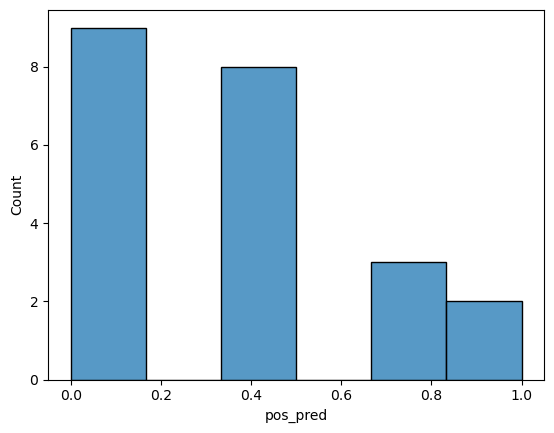

In [25]:
# create probability distribution graph
import seaborn as sns

sns.histplot(final_model, x="pos_pred")

### Task 2: Determine how the probabilities are calculated

1. First, looking at the "final model" dataframe from three cells above, list the rows that have errors in the classification. 

2. Use the code below to again adjust the k value in the "Second Model Building Cell" and the run the "Graph Cell". Use the same range of values as you did in Task 1. This time look at the graph and note the changes. Then based on what you are seeing determine how the probabilities are being generated. 

3. Lastly, the model will predict anything above 50% as the positive class (good cereal). Given this information what are the risks of having too small of a k value? 

##### Second Model Building Cell

In [26]:
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = Train.drop(['rating_f'], axis=1).values #features
y_train = Train['rating_f'].values #target

neigh = KNeighborsClassifier(n_neighbors=5) #this is the value to change
neigh.fit(X_train, y_train)

KNeighborsClassifier()

##### Graph Cell

<Axes: xlabel='good_cereal_prob', ylabel='Count'>

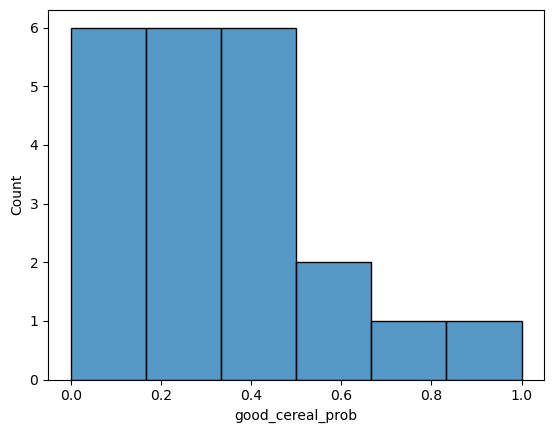

In [27]:
test_probs_1 = neigh.predict_proba(X_test)

#converting to a dataframe to make seaborn happy
test_probs_1 = pd.DataFrame(test_probs_1, columns = ['bad_cereal_prob', 'good_cereal_prob'])

#gnerates the plot
sns.histplot(test_probs_1, x= "good_cereal_prob")